In [1]:
# CONNECT GOOGLE DRIVE
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !unzip '/content/drive/My Drive/dataset/UCMerced.zip' -d '/content/drive/My Drive/dataset/ucmerced'

Archive:  /content/drive/My Drive/dataset/UCMerced.zip
   creating: /content/drive/My Drive/dataset/ucmerced/UCMerced_LandUse/
   creating: /content/drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images/
   creating: /content/drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images/forest/
  inflating: /content/drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images/forest/forest44.tif  
  inflating: /content/drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images/forest/forest34.tif  
  inflating: /content/drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images/forest/forest19.tif  
  inflating: /content/drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images/forest/forest96.tif  
  inflating: /content/drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images/forest/forest91.tif  
  inflating: /content/drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images/forest/forest43.tif  
  inflating: /content/drive/My Drive/dataset/ucmerced/UCMerced_LandUse/Images/forest/forest09.tif  
  inflat

In [3]:
# IMPORT LIBRARY
import pandas as pd
import cv2
import numpy as np
import os
import re
import glob

In [4]:
# READ IMAGE
path = os.path.abspath('landuse_msib.ipynb') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
dirs = os.listdir(path+'UCMerced_LandUse/Images') #list directory in Land Use Images folder
label = 0 #label dari data
im_arr = [] #array untuk gambar
lb_arr = [] #array untuk label
X = [] #array untuk X
y = [] #array untuk y
for i in dirs: #loop all directory
    count = 0 #count data
    for pic in glob.glob(path+'UCMerced_LandUse/Images/'+i+'/*.tif'): #loop jpg difolder
        im = cv2.imread(pic) #open image pakai opencv
        im = cv2.resize(im,(100,100)) #resize gambar ke 32 x 32
        im = np.array(im) #change into array 
        count = count + 1 #count data + 1
        X.append(im) #masukan gambar yg sudah dibaca kedalam X
        y.append(label) #masukan label yang sudah dibaca kedalam y
        if(count == 3): #SAmple data no.3 tampilkan nanti di plot
            im_arr.append({str(i):im}) #sample data no.3 tampilkan
    print("Jumlah "+str(i)+" : "+str(count)) #print jumlah data
    label = label + 1 #label saat ini + 1
    lb_arr.append(i) #labelarray
X = np.array(X)
y = np.array(y);

Jumlah agricultural : 100
Jumlah airplane : 100
Jumlah baseballdiamond : 100
Jumlah beach : 100
Jumlah buildings : 100
Jumlah chaparral : 100
Jumlah denseresidential : 100
Jumlah forest : 100
Jumlah freeway : 100
Jumlah golfcourse : 100
Jumlah harbor : 100
Jumlah intersection : 100
Jumlah mediumresidential : 100
Jumlah mobilehomepark : 100
Jumlah overpass : 100
Jumlah parkinglot : 100
Jumlah river : 100
Jumlah runway : 100
Jumlah sparseresidential : 100
Jumlah storagetanks : 100
Jumlah tenniscourt : 100


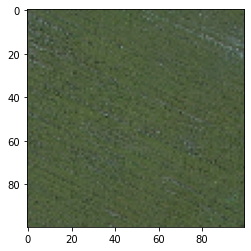

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X[32])
plt.show()

In [8]:
import os
import re
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.models import load_model

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
X.dtype

dtype('uint8')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.astype('float32') #set x_train data type as float32
X_test = X_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1
y_train = to_categorical(y_train, 21) #change label to binary / categorical: [1 0 0 0] = 0, [0 1 0 0] = 1, so on
y_test = to_categorical(y_test, 21) #change label to binary / categorical

In [11]:
print(y_train[30])
print(y_train[31])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


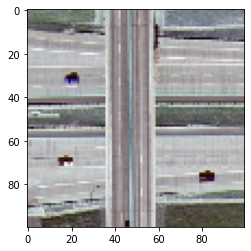

In [12]:
plt.imshow(X_train[35])
plt.show()

In [13]:
X_train.shape

(1407, 100, 100, 3)

In [14]:
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(32, (3, 3), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(21, activation='softmax')) #softmax works

In [15]:
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 flatten (Flatten)           (None, 16928)             0

D:\Application\Anaconda\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
44/44 [==============================] - 15s 292ms/step - loss: 3.0566 - accuracy: 0.0519 - val_loss: 3.0356 - val_accuracy: 0.0491
Epoch 2/5
44/44 [==============================] - 11s 252ms/step - loss: 3.0294 - accuracy: 0.0569 - val_loss: 3.0099 - val_accuracy: 0.1948
Epoch 3/5
44/44 [==============================] - 11s 256ms/step - loss: 2.9553 - accuracy: 0.0988 - val_loss: 2.8480 - val_accuracy: 0.1847
Epoch 4/5
44/44 [==============================] - 11s 258ms/step - loss: 2.8898 - accuracy: 0.1251 - val_loss: 2.7889 - val_accuracy: 0.1429
Epoch 5/5
44/44 [==============================] - 11s 258ms/step - loss: 2.7842 - accuracy: 0.1421 - val_loss: 2.6233 - val_accuracy: 0.1948
Accuracy: 19.48%
